In [1]:
# Import Modules
import numpy as np
import math
from matplotlib import pyplot as plt
import scipy as sp

In the following we define three kernel functions:
$$
    k_1(x) = a_0 + a_1x + \frac{a_2}{\sqrt{2}}(x^2-1), k_2(x) = a_0 + a_1x + \frac{a_2}{\sqrt{2}}(x^2 + 1) + \frac{a_3}{\sqrt{6}}(x^3 - 3x)\text{ and }k_3(x) = \frac{x^2-1}{\sqrt{2}} + \frac{x^3-3x}{\sqrt{6}}.
$$

In [2]:
# Define Kernel Functions
def kernel1 (x, a_0 = 0, a_1 = 1, a_2 = 1):
    return (a_0 + a_1 * x + a_2 * (x ** 2 - 1) / math.sqrt(2))

def kernel2(x, a_0 = 0, a_1 = 1, a_2 = 1, a_3 = 1):
    return (a_0 + a_1 * x + a_2 * (x ** 2 - 1) / math.sqrt(2) + a_3 * (x ** 3 - 3 * x) / math.sqrt(6))

def kernel3(x):
    return ((x**2-1)/math.sqrt(2) + (x**3-3*x)/math.sqrt(6))

In [3]:
def kernelmatrix (GramMatrix, n, kernel = kernel2, a1 = 1, a2 = 1, a3 = 1):
    (a, b) = GramMatrix.shape
    y = np.zeros((a, b))

    for i in range(a):
        for j in range(b):
            if i != j :
                y[i, j] = kernel(GramMatrix[i, j], a_1 = a1, a_2 = a2, a_3 = a3)/math.sqrt(n)
    return y

In the following simulation we consider $k_2$ with $a_0 = 0, a_1 = a_2 = 1$ and $a_3 = 0$. We expect to an asymmetric distribution with $1$ outlying eigenvalue.

[ 9.92433476 10.03096088 10.07343696 10.09349209 10.16671543]
-6.2309336681840595


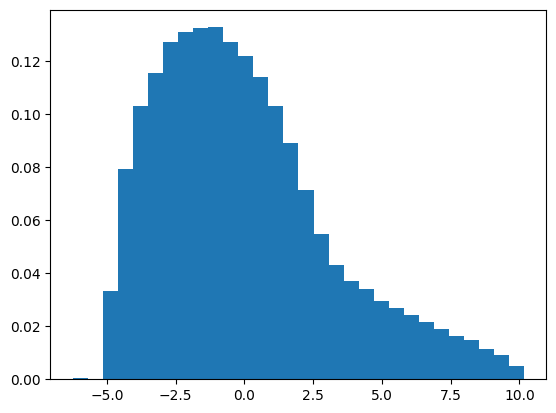

In [4]:
n = 1000
d = 5000
snr = 0

v = np.random.normal(0,1,d)

Sigma = np.eye(d) + snr * np.outer(v, v) / np.dot(v, v)
data = np.random.normal(0, 1, (d, n))
GramMatrix = np.matmul(data, data.transpose()) / np.sqrt(n)
KMatrix = kernelmatrix(GramMatrix, n = n, a1 = 1, a2 = 1, a3 = 0)

KMatEigenVals = np.linalg.eigvalsh(KMatrix)
plt.hist(KMatEigenVals, 30, density = True)
print(KMatEigenVals[-5:])
print (KMatEigenVals[0])
plt.show() 

In the following simulation we consider $k_2$ with $a_0=0, a_1 = 10, a_2 = a_3 = 0$. We expect an assymetric distribution with no outlying eigenvalues.

[41.4552557  41.56280496 41.69245853 41.85968438 42.25920631]
-10.447203267035192


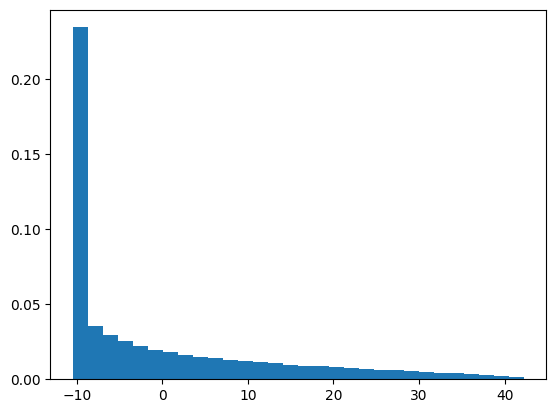

In [5]:
n = 3000
d = 5000
snr = 0

v = np.random.normal(0,1,d)

Sigma = np.eye(d) + snr * np.outer(v, v) / np.dot(v, v)
data = np.random.normal(0, 1, (d, n))
GramMatrix = np.matmul(data, data.transpose()) / np.sqrt(n)
KMatrix = kernelmatrix(GramMatrix, n = n, a1 = 10, a2 = 0, a3 = 0)

KMatEigenVals = np.linalg.eigvalsh(KMatrix)
plt.hist(KMatEigenVals, 30, density = True)
print(KMatEigenVals[-5:])
print (KMatEigenVals[0])
plt.show() 

In the following we consider $k_2$ with $a_0 = a_3 = 0$ and $a_1 = 1, a_2 = 10$. We expect an almost symmetric distribution with two outlying eigenvalues.

[47.14310971 47.28421071 47.46096006 47.72573551 63.64045375]
-58.60631666026889


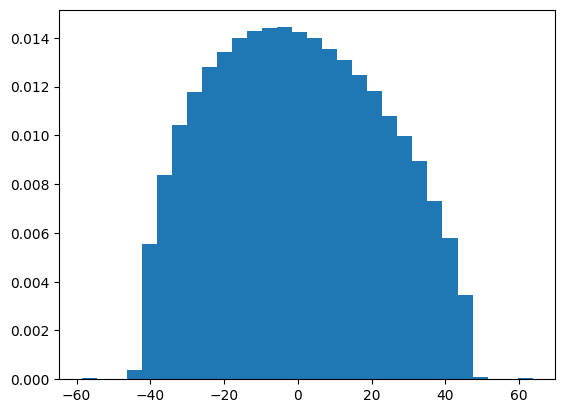

In [6]:
n = 1000
d = 5000
snr = 0

v = np.random.normal(0,1,d)

Sigma = np.eye(d) + snr * np.outer(v, v) / np.dot(v, v)
data = np.random.normal(0, 1, (d, n))
GramMatrix = np.matmul(data, data.transpose()) / np.sqrt(n)
KMatrix = kernelmatrix(GramMatrix, n = n, a1 = 1, a2 = 10, a3 = 0)

KMatEigenVals = np.linalg.eigvalsh(KMatrix)
plt.hist(KMatEigenVals, 30, density = True)
print(KMatEigenVals[-5:])
print (KMatEigenVals[0])
plt.show() 